# Churn_Modelling dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Drop the unwanted variables
dataset1 = dataset.iloc[:,3:]

In [4]:
dataset1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Pre-Processing Part

In [5]:
# part 1 - missing value
dataset1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Label Encoder
dataset1['Geography'] = dataset1['Geography'].astype('category')
dataset1['Geography'] = dataset1['Geography'].cat.codes

dataset1['Gender'] = dataset1['Gender'].astype('category')
dataset1['Gender'] = dataset1['Gender'].cat.codes

In [8]:
dataset1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# One Hot Encoding

dataset1 = pd.get_dummies(dataset1, columns=['Geography','Gender'])

In [10]:
dataset1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [11]:
# Dummy variables
dataset1 = dataset1.drop(['Geography_0','Gender_0'], axis=1)

In [12]:
dataset1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
print(dataset1.shape)

(10000, 12)


In [14]:
# part 5 - check imbalance dataset
dataset1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
# split the data into x and y basis idependent and dependent variable
x = dataset1.drop(['Exited'], axis=1)
y = dataset1['Exited']

In [16]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [19]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [20]:
y_train.value_counts()

0    6374
1    1626
Name: Exited, dtype: int64

In [23]:
#smote- synthetic minority over sampling techq
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [24]:
pip install --upgrade scikit-learn imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/257.7 kB 1.3 MB/s eta 0:00:01
   ------------ -------------------------- 81.9/257.7 kB 919.0 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/257.7 kB 901.1 kB/s eta 0:00:01
   ---------------------------------------  256.0/257.7 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [28]:
#from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=11)
x_over, y_over = sm.fit_resample(x_train,y_train)

In [ ]:
print(x_over.shape)
print(y_over.shape)

In [22]:
y_over.value_counts()

NameError: name 'y_over' is not defined

In [29]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()
model.fit(x_over, y_over)
pred = model.predict(x_test)

NameError: name 'x_over' is not defined

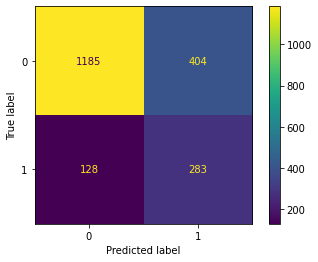

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [30]:
from sklearn.metrics import classification_report
#print(classification_report(pred, y_test))

In [31]:
print(classification_report( y_test,pred))

NameError: name 'pred' is not defined

In [ ]:
# model 2

In [29]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Gender_1
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [30]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [31]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [32]:
x.shape

(10000, 11)

In [33]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
x_new, y_new = sm.fit_resample(x,y)

In [34]:
y_new.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [35]:
x_new.shape

(15926, 11)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,train_size=0.8,random_state=7)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 11)
(3186, 11)
(12740,)
(3186,)


In [37]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [38]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

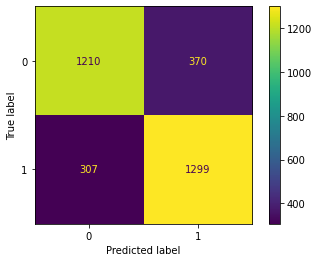

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1580
           1       0.78      0.81      0.79      1606

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [ ]:
# model 3 

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=11)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [43]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
x_train=rs.fit_transform(x_train)
x_test=rs.transform(x_test)

In [44]:
from sklearn.naive_bayes import GaussianNB  
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

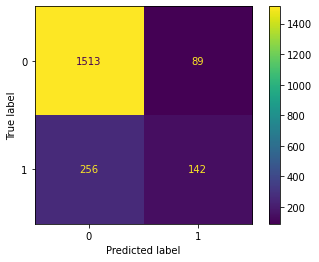

In [45]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1602
           1       0.61      0.36      0.45       398

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.67      2000
weighted avg       0.81      0.83      0.81      2000

